In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter



In [29]:
df = pd.read_csv('sports_data.csv')
df['date_event'] = pd.to_datetime(df['date_event'])
df.set_index('date_event', inplace=True)
df.head()

,Unnamed: 0,id,event_uuid,event_id,sport_id,season_type,season_year,away_team_id,home_team_id,away_team,...,away_score,home_score,league_name,event_name,broadcast,event_location,attendance,updated_at,event_status,event_status_detail
date_event,,,,,,,,,,,,,,,,,,,,,
2021-01-16 00:00:00+00:00,0,68426,11eb-578d-c6aa8000-825e-c139aeae1ffe,f04ec319fb9b7a3ce7bc91632445fc67,4,Regular Season,2021,15,8,Washington,...,0,0,National Basketball Association,Washington at Detroit - 2021-01-16,FSDT,Little Caesars Arena,0,2021-01-15T23:46:14Z,STATUS_POSTPONED,Postponed
2021-01-16 00:30:00+00:00,1,68432,11eb-5791-f78cb400-81e1-2e6892c31fd1,16bcaa3bd1064f12cb4abaf7d5237d8d,4,Regular Season,2021,3,7,New York,...,103,106,National Basketball Association,New York at Cleveland - 2021-01-16,FSOH,Rocket Mortgage FieldHouse,0,2021-01-15T23:46:14Z,STATUS_FINAL,Final
2021-01-16 00:30:00+00:00,2,68435,11eb-5791-f78cb400-84ed-229218bf6568,737999069c9f442436874fb210436ec7,4,Regular Season,2021,26,10,Dallas,...,109,112,National Basketball Association,Dallas at Milwaukee - 2021-01-16,ESPN,Fiserv Forum,0,2021-01-15T23:46:14Z,STATUS_FINAL,Final
2021-01-16 00:30:00+00:00,3,68429,11eb-5791-f78cb400-86c2-7ccaf9acb349,5563df51851866d8492ebe53f686dfa8,4,Regular Season,2021,14,1,Orlando,...,97,124,National Basketball Association,Orlando at Boston - 2021-01-16,CSNN,TD Garden,0,2021-01-15T23:46:14Z,STATUS_FINAL,Final
2021-01-16 01:00:00+00:00,4,68438,11eb-5796-286ee800-85d1-3f0b8c3a65e4,666f11c2481503265f01925d8f9e11a7,4,Regular Season,2021,28,17,Memphis,...,0,0,National Basketball Association,Memphis at Minnesota - 2021-01-16,FSN,Target Center,0,2021-01-15T23:46:14Z,STATUS_POSTPONED,Postponed


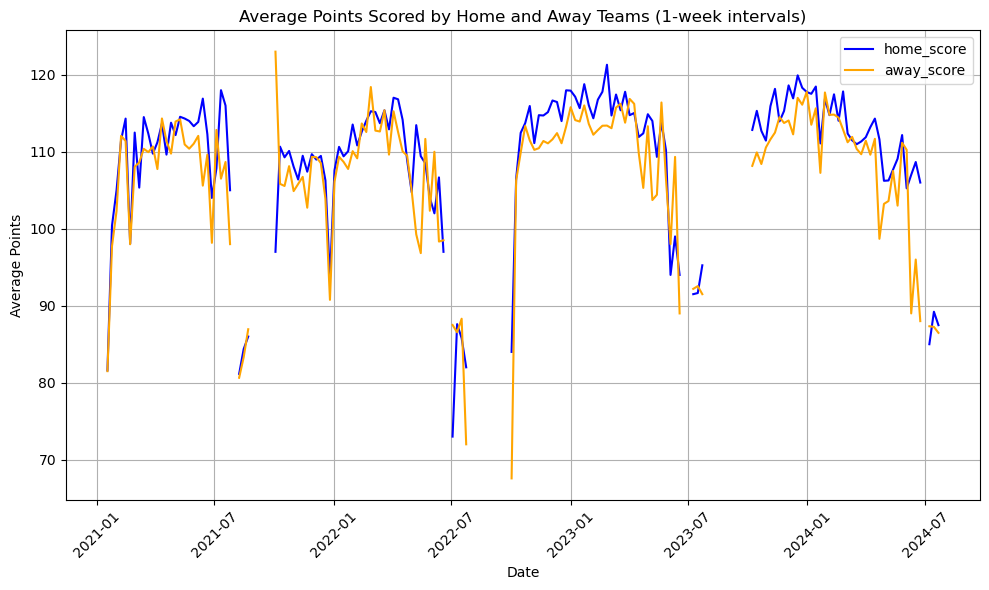

In [11]:
# Resample over 2-week windows and calculate the mean for both home and away scores
df_resampled = df[['home_score', 'away_score']].resample('1W').mean()

plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['home_score'], label='home_score', color='blue')
plt.plot(df_resampled.index, df_resampled['away_score'], label='away_score', color='orange')

plt.title('Average Points Scored by Home and Away Teams (1-week intervals)')
plt.xlabel('Date')
plt.ylabel('Average Points')
plt.legend()
plt.grid(True)

# Format the date on the x-axis
date_format = DateFormatter("%Y-%m")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

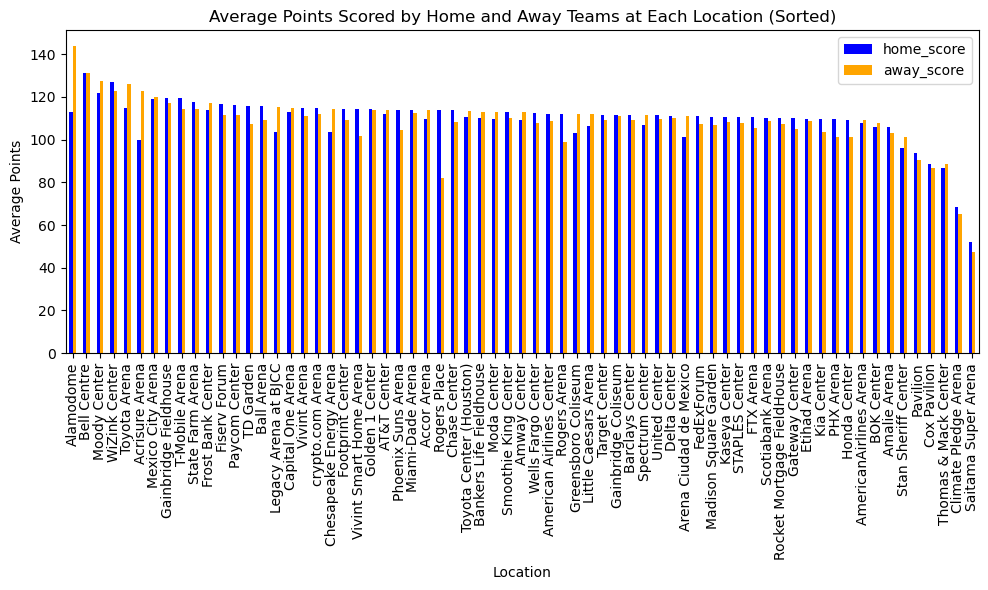

In [14]:
# Group by location and calculate the mean for both home and away scores
df_location = df.groupby('event_location')[['home_score', 'away_score']].mean()

# Add a new column 'max_score' which is the maximum of home and away scores at each location
df_location['max_score'] = df_location[['home_score', 'away_score']].max(axis=1)

# Sort the dataframe by the 'max_score' column in descending order
df_location_sorted = df_location.sort_values(by='max_score', ascending=False)

# Drop the 'max_score' column (since it's no longer needed for plotting)
df_location_sorted = df_location_sorted.drop(columns=['max_score'])

# Plot the sorted data
df_location_sorted.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])

plt.title('Average Points Scored by Home and Away Teams at Each Location (Sorted)')
plt.xlabel('Location')
plt.ylabel('Average Points')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

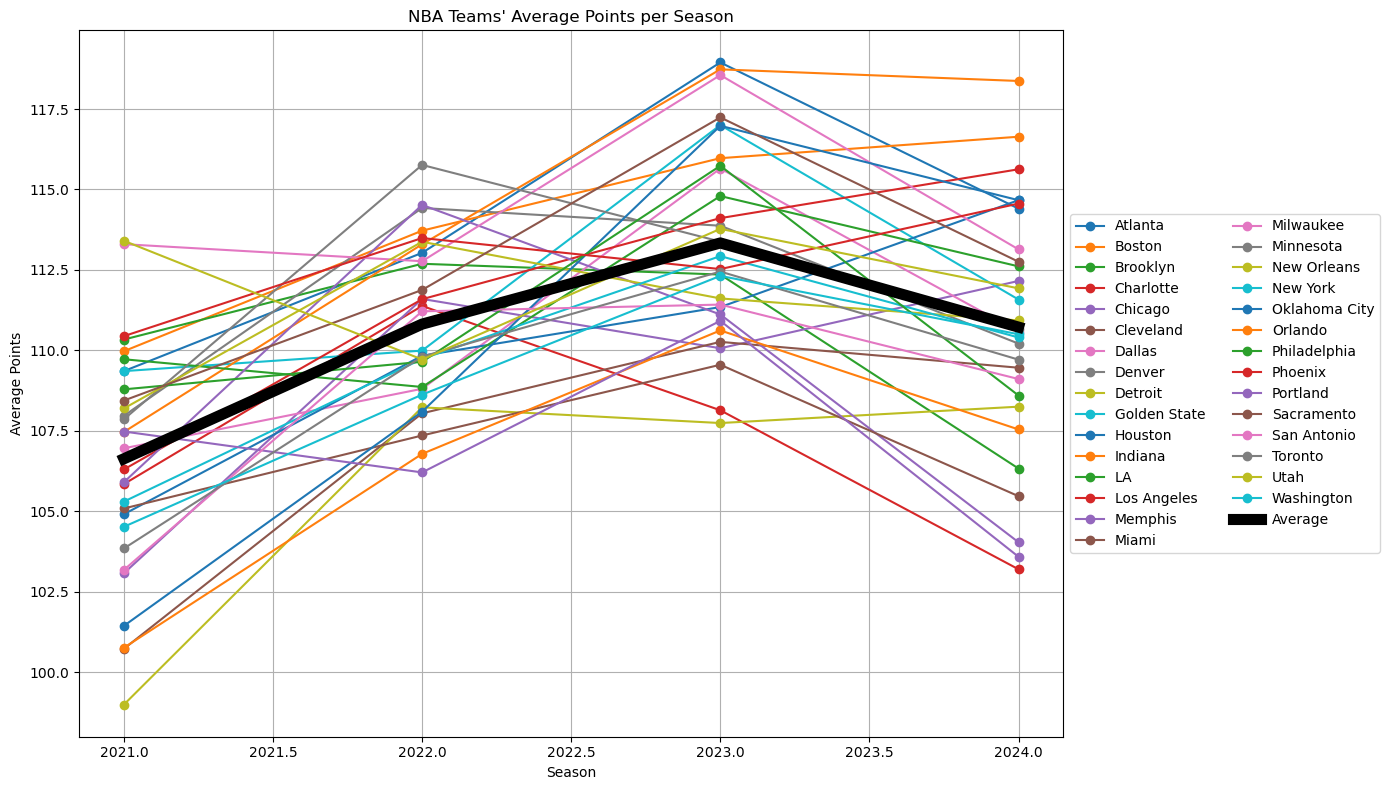

In [38]:
# Reset the index to bring back 'event_date' and prepare for melting
#df = df.reset_index()
df = df[~df['away_team'].isin(['Adelaide', 'RA\'ANANA', 'Cairns', 'Flamengo', 'New Zealand', 'Real', 'Team Giannis', 'China', 'Team Durant', 'Team LeBron', 'Western Conf', 'Eastern Conf'])]
df = df[~df['home_team'].isin(['Adelaide', 'RA\'ANANA', 'Cairns', 'Flamengo', 'New Zealand', 'Real', 'Team Giannis', 'China', 'Team Durant', 'Team LeBron', 'Western Conf', 'Eastern Conf'])]


# Ensure 'event_date' is datetime and extract the season year
df['date_event'] = pd.to_datetime(df['date_event'])
df['season'] = df['date_event'].dt.year

# Melt the dataframe to get a single column for 'team' and link scores with team type
df_melted = pd.melt(df, 
                    id_vars=['season', 'home_score', 'away_score'], 
                    value_vars=['home_team', 'away_team'], 
                    var_name='team_type', 
                    value_name='team')

# Link scores based on team type (home or away)
df_melted['score'] = df_melted.apply(
    lambda row: row['home_score'] if row['team_type'] == 'home_team' 
                else row['away_score'], axis=1)

# Group by season and team to calculate the average score
df_seasonal_avg = df_melted.groupby(['season', 'team'])['score'].mean().reset_index()

# Calculate overall average score for each season
overall_avg = df_seasonal_avg.groupby('season')['score'].mean().reset_index()
overall_avg['team'] = 'Average'  # Add a column to identify it in the plot

# Plot each team's performance over seasons
plt.figure(figsize=(14, 8))
for team in df_seasonal_avg['team'].unique():
    team_data = df_seasonal_avg[df_seasonal_avg['team'] == team]
    plt.plot(team_data['season'], team_data['score'], label=team, marker='o')

# Plot the overall average score
plt.plot(overall_avg['season'], overall_avg['score'], label='Average', color='black', linewidth=8, linestyle='-')

# Customize the plot
plt.title("NBA Teams' Average Points per Season")
plt.xlabel("Season")
plt.ylabel("Average Points")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)  # Adjust legend placement
plt.grid(True)
plt.tight_layout()
plt.show()